In [50]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [51]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from ews_analysis import hopf_helper as hh
from ews_helper import get_ews, itoEulerMaruyama


In [52]:
"""
x_dot = rx - x^3
r_dot = epsilon
"""
r_0 = -1
x0, y0 = 0, 0
epsilon = 0.01
sigma = 0.1 # noise

t_span, t_points= 410, 50000 
time = np.linspace(-5000, t_span, t_points)
dt = t_span/t_points

ews_win_size = t_points // 20
ews_offset = ews_win_size // 3

In [53]:
# Pitchfork bifurcation model

def dSdt(t, S, epsilon):
    """
        x_dot = rx - x^3
        r_dot = epsilon
    """
    x, y = S
    try:
        shaper = np.ones_like(y)
    except:
        try:
            shaper = np.ones(len(y))
        except:
            shaper = 1

    return [
        y + t*epsilon*x - x**3,
        epsilon * shaper
    ]

In [54]:
# Euler Maruyama
results,derivatives = itoEulerMaruyama(
    model=dSdt,
    y0=[x0, y0],
    time=time,
    noise=[sigma,0],args=(epsilon,),save_derivative=True
)

slope,intercept,_,_,_ = linregress(time, results[:,0])
# mu=0=intercept+slope*t iff t=-intercept/slope
t_star = time[np.where(results[:,0] >= 1)[0][0]]

/var/folders/6d/3ysrgvk17qnfyq7g19hr9wfh0000gn/T/ipykernel_28205/3560194315.py:18: RuntimeWarning: overflow encountered in double_scalars
  y + t*epsilon*x - x**3,
/Users/barak/Projects/differential_equations/ews_analysis/ews_helper.py:123: RuntimeWarning: invalid value encountered in add
  ret_val[i, :] = ret_val[i - 1, :] + \


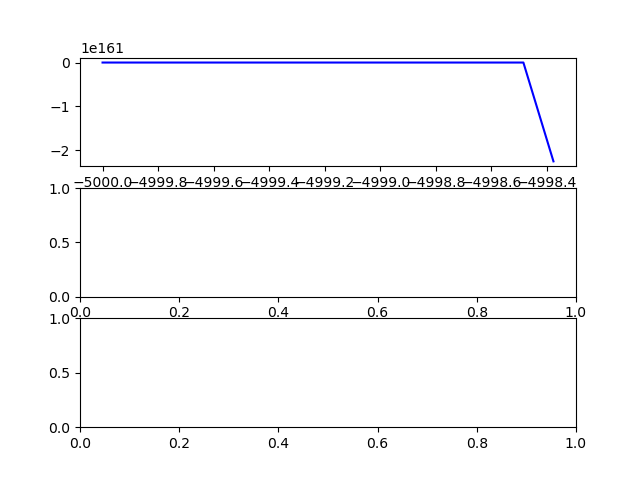

In [55]:
fig, axs = plt.subplots(3, 1)
axs[0].plot(time, results[:,0], color='b', label='x(t)')